# Contaminante PM10

# (Año 2015)

In [1]:
# Se van a agrupar los registros del contaminante en semanas

# Se importan las librerias necesarias
import pandas as pd
# Se declara una variable con el nombre del contaminante a analizar
contaminante = 'PM10'
# Se declaran las columnas a extraer de la base de datos
columns = ['timestamp', contaminante]
# Se lee el archivo y los datos recuperados se guardan en 'dataframecontaminante'
dataframecontaminante = pd.read_csv('filled.csv', usecols=columns).dropna()
# Se convierten los strings a objeto datetime
strfdt = '%d-%b-%y %H'
dataframecontaminante['timestamp'] = pd.to_datetime(dataframecontaminante['timestamp'], errors = 'coerce', format=strfdt)
# Se eliminan los espacios vacios
dataframecontaminante = dataframecontaminante.dropna()
# Se acomoda el indice empezando en 0 con un incremento de 1
dataframecontaminante = dataframecontaminante.reset_index(drop=True)
# Se imprime 'dataframecontaminante'
dataframecontaminante

,timestamp,PM10
0,1993-01-01 00:00:00,41.0
1,1993-01-01 00:00:00,30.5
2,1993-01-01 00:00:00,60.0
3,1993-01-01 00:00:00,38.5
4,1993-01-01 01:00:00,41.0
...,...,...
1382706,2018-12-31 23:00:00,445.0
1382707,2018-12-31 23:00:00,134.0
1382708,2018-12-31 23:00:00,392.0
1382709,2018-12-31 23:00:00,40.0


In [2]:
# Los datos de la columna 'timestamp' se vuelven a convertir a strings
dataframecontaminante['timestamp'] = dataframecontaminante['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d %H'))
dataframecontaminante

,timestamp,PM10
0,1993-01-01 00,41.0
1,1993-01-01 00,30.5
2,1993-01-01 00,60.0
3,1993-01-01 00,38.5
4,1993-01-01 01,41.0
...,...,...
1382706,2018-12-31 23,445.0
1382707,2018-12-31 23,134.0
1382708,2018-12-31 23,392.0
1382709,2018-12-31 23,40.0


In [3]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2015'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

,timestamp,PM10
0,2015-01-01 00,37.0
1,2015-01-01 00,60.0
2,2015-01-01 00,26.0
3,2015-01-01 00,89.0
4,2015-01-01 00,66.0
...,...,...
79126,2015-12-31 23,49.0
79127,2015-12-31 23,37.0
79128,2015-12-31 23,42.0
79129,2015-12-31 23,74.0


In [4]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

,timestamp,PM10
0,2015-01-01 00:00:00,37.0
1,2015-01-01 00:00:00,60.0
2,2015-01-01 00:00:00,26.0
3,2015-01-01 00:00:00,89.0
4,2015-01-01 00:00:00,66.0
...,...,...
79126,2015-12-31 23:00:00,49.0
79127,2015-12-31 23:00:00,37.0
79128,2015-12-31 23:00:00,42.0
79129,2015-12-31 23:00:00,74.0


In [5]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

,timestamp,PM10,sem
0,2015-01-01 00:00:00,37.0,53
1,2015-01-01 00:00:00,60.0,53
2,2015-01-01 00:00:00,26.0,53
3,2015-01-01 00:00:00,89.0,53
4,2015-01-01 00:00:00,66.0,53
...,...,...,...
79126,2015-12-31 23:00:00,49.0,52
79127,2015-12-31 23:00:00,37.0,52
79128,2015-12-31 23:00:00,42.0,52
79129,2015-12-31 23:00:00,74.0,52


In [6]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
entidad = 19
colums = ['EGRESO', 'DIAG_INI', 'ENTIDAD']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño = dataframeegresosaño.loc[dataframeegresosaño['ENTIDAD'] == entidad]
dataframeegresosaño

,EGRESO,ENTIDAD,DIAG_INI
2721,2015-12-01 00:00:00,19,C349
3052,2015-08-24 00:00:00,19,C186
3098,2015-07-15 00:00:00,19,C509
3254,2015-06-18 00:00:00,19,C509
8651,2015-05-09 00:00:00,19,C189
...,...,...,...
2923756,2015-06-10 00:00:00,19,J342
2931414,2015-08-18 00:00:00,19,M190
2934869,2015-09-09 00:00:00,19,C229
2943586,2015-11-20 00:00:00,19,K801


In [7]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%Y-%m-%d %H:%M:%S'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

,EGRESO,ENTIDAD,DIAG_INI,sem
0,2015-12-01,19,C349,48
1,2015-08-24,19,C186,34
2,2015-07-15,19,C509,28
3,2015-06-18,19,C509,24
4,2015-05-09,19,C189,18
...,...,...,...,...
53336,2015-06-10,19,J342,23
53337,2015-08-18,19,M190,33
53338,2015-09-09,19,C229,36
53339,2015-11-20,19,K801,46


In [8]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     1068
2     1016
3     1026
4     1034
5      964
6     1036
7     1048
8      983
9      938
10     978
11     906
12    1011
13     932
14     978
15    1056
16    1018
17    1010
18     966
19    1044
20     988
21     999
22     977
23    1044
24    1021
25    1052
26    1022
27    1076
28    1106
29    1039
30    1060
31    1063
32    1072
33    1073
34    1087
35    1123
36    1077
37    1103
38    1105
39    1038
40    1129
41    1128
42    1117
43    1116
44    1115
45    1059
46     992
47    1066
48    1089
49    1106
50    1138
51     790
53     359
Name: sem, dtype: int64

In [9]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

<ipython-input-9-967a018ff37a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
<ipython-input-9-967a018ff37a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
<ipython-input-9-967a018ff37a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño[contamin

,sem,PM10
0,1,68.988088
1,2,86.17623
2,3,94.648447
3,4,94.568735
4,5,72.864933
5,6,87.193587
6,7,97.136986
7,8,64.924541
8,9,70.800888
9,10,71.327493



2015

PM10 & O809


<ipython-input-10-1406bf182538>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]


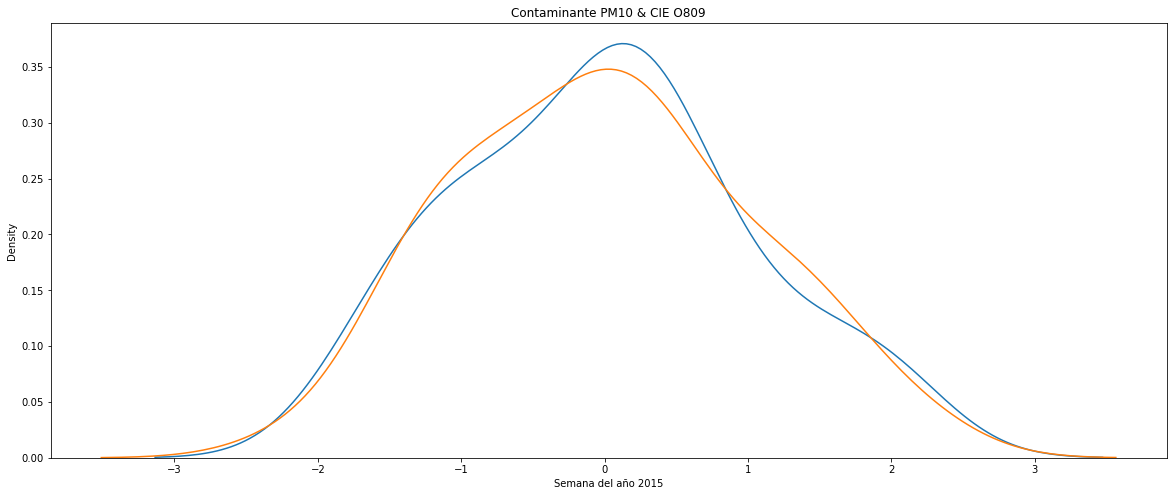

<ipython-input-10-1406bf182538>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



PM10 & O829


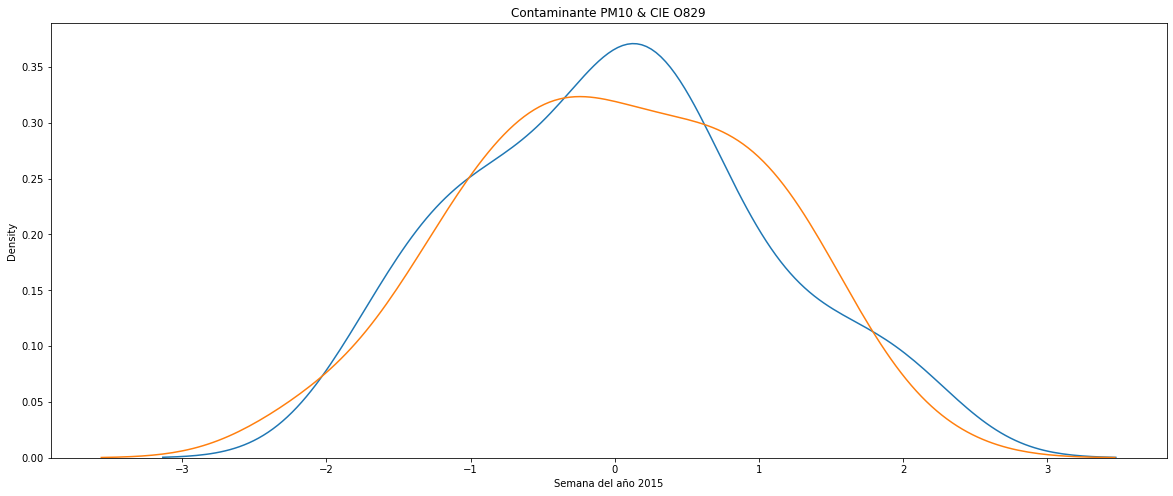

<ipython-input-10-1406bf182538>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



PM10 & O759


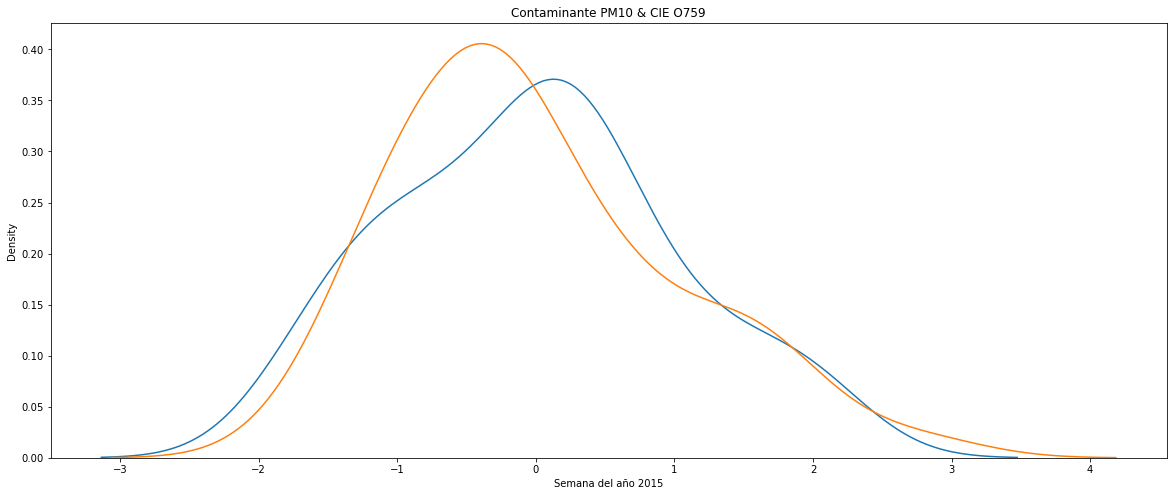

<ipython-input-10-1406bf182538>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



PM10 & O069


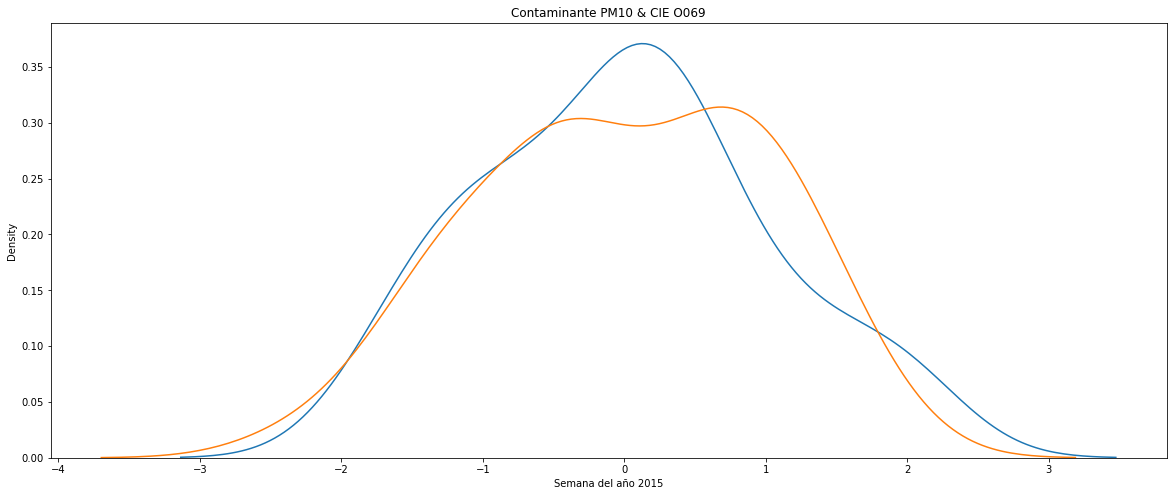

<ipython-input-10-1406bf182538>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



PM10 & K802


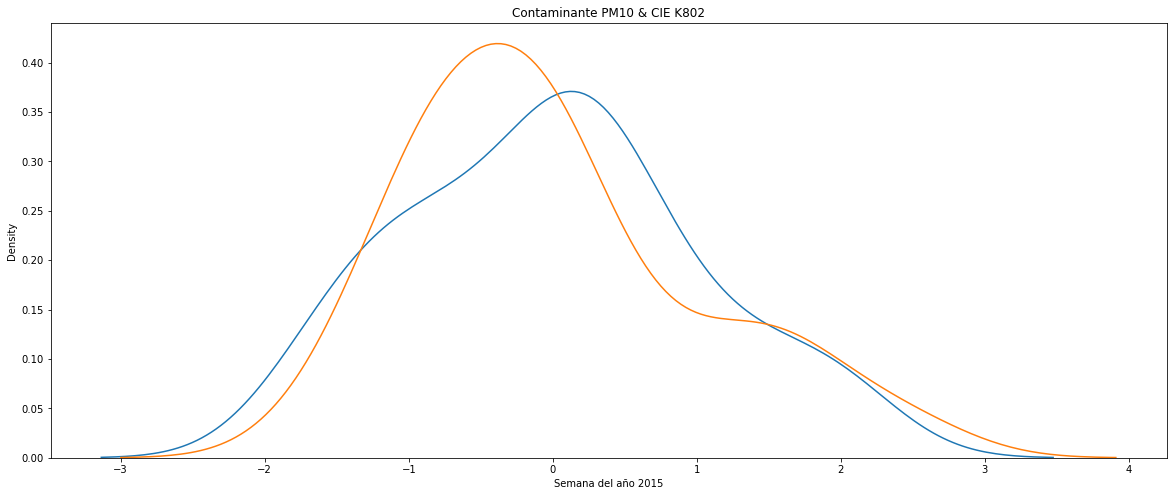

<ipython-input-10-1406bf182538>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



PM10 & K358


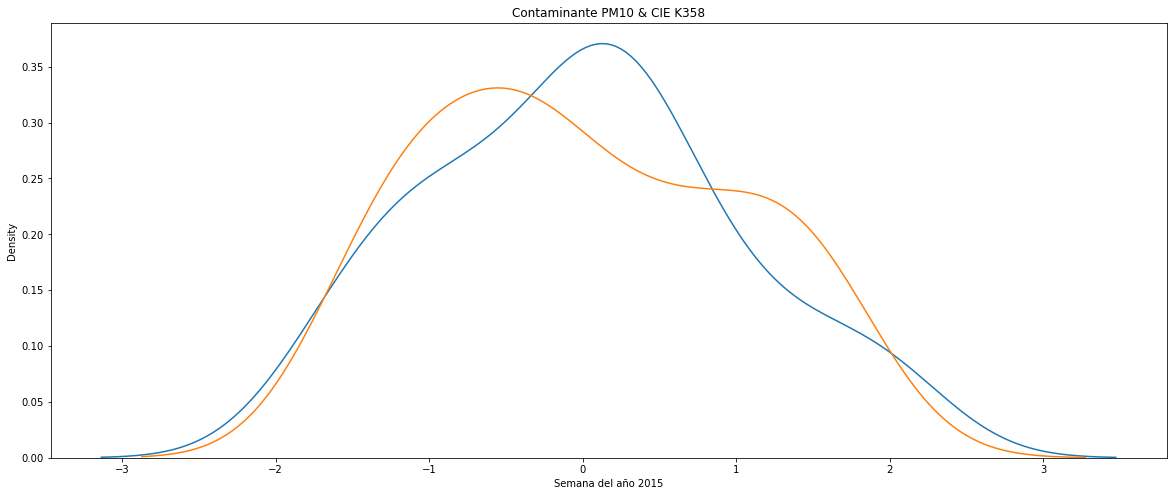

<ipython-input-10-1406bf182538>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



PM10 & O064


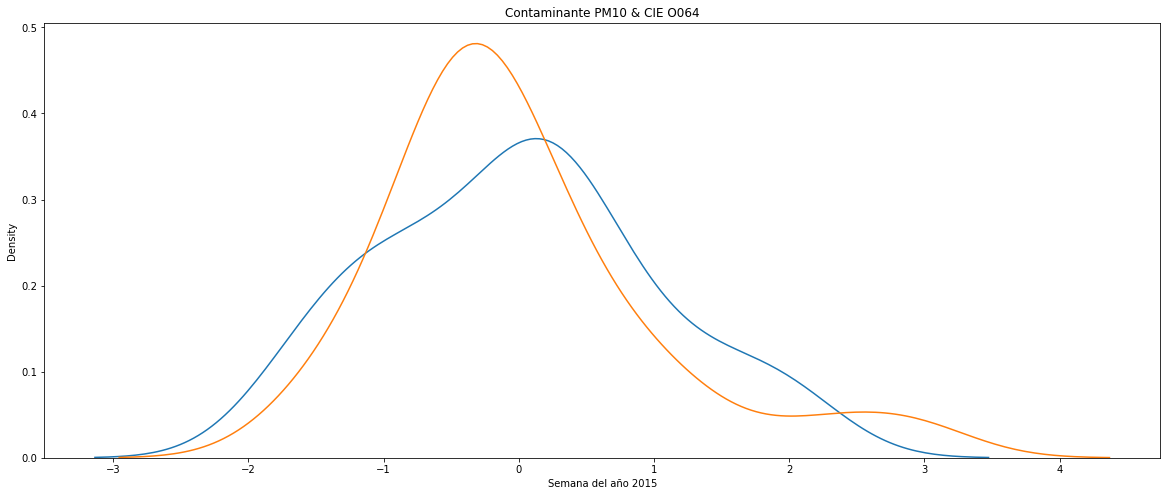

<ipython-input-10-1406bf182538>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



PM10 & H


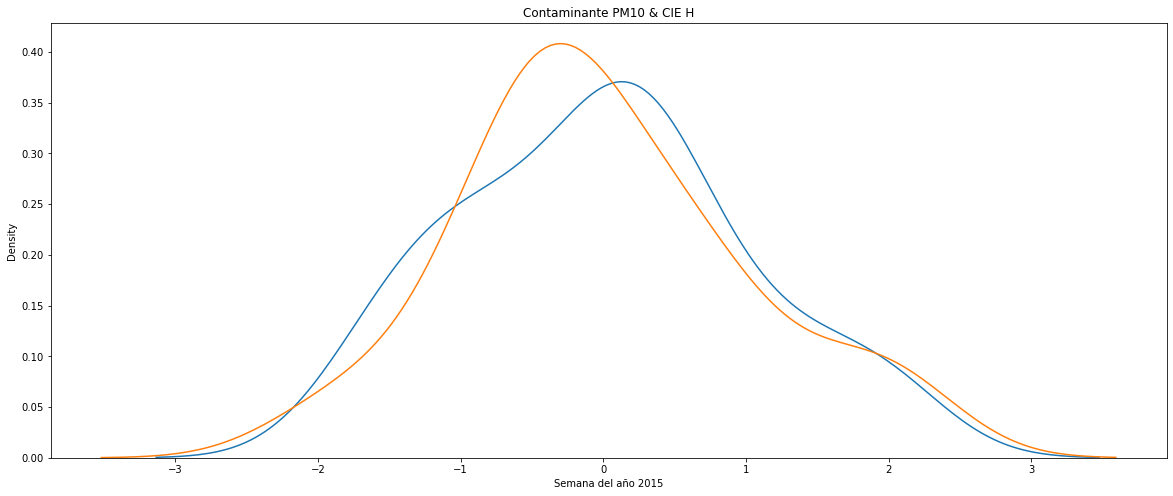

<ipython-input-10-1406bf182538>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



PM10 & I


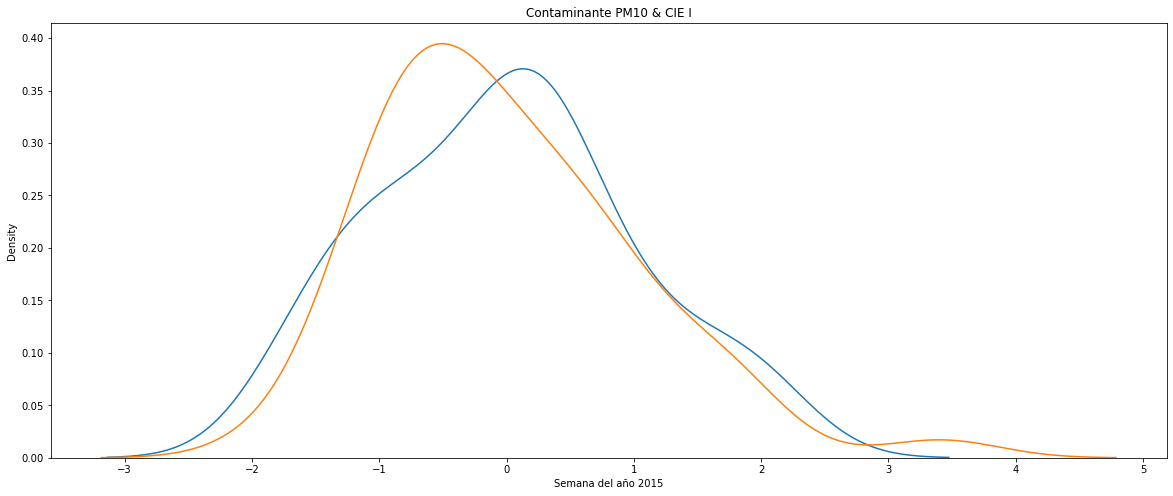

<ipython-input-10-1406bf182538>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



PM10 & J


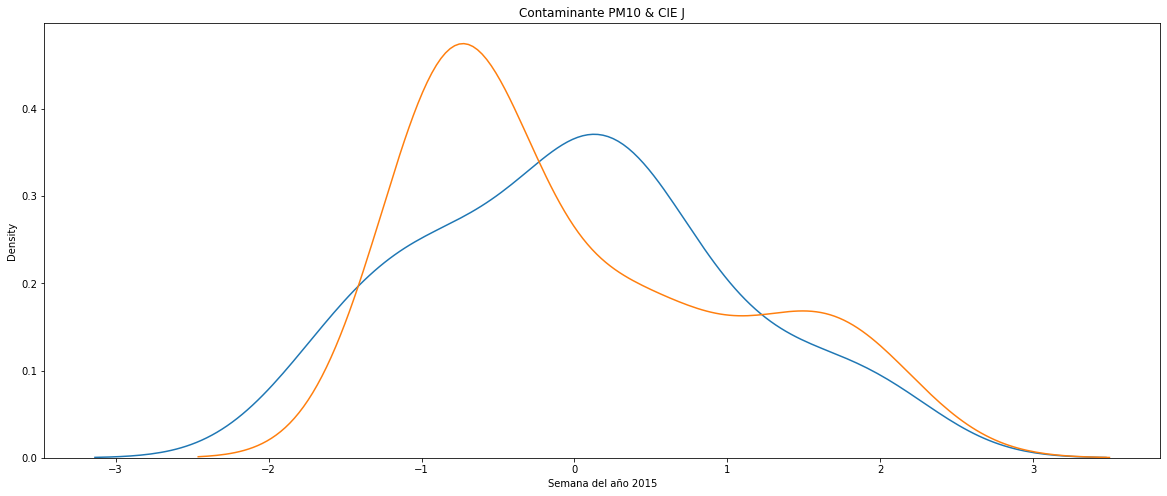

In [10]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2016)

In [11]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2016'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

,timestamp,PM10
0,2016-01-01 00,49.0
1,2016-01-01 00,109.0
2,2016-01-01 00,84.0
3,2016-01-01 00,102.0
4,2016-01-01 00,82.0
...,...,...
84267,2016-12-31 23,149.0
84268,2016-12-31 23,143.0
84269,2016-12-31 23,280.0
84270,2016-12-31 23,364.0


In [12]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

,timestamp,PM10
0,2016-01-01 00:00:00,49.0
1,2016-01-01 00:00:00,109.0
2,2016-01-01 00:00:00,84.0
3,2016-01-01 00:00:00,102.0
4,2016-01-01 00:00:00,82.0
...,...,...
84267,2016-12-31 23:00:00,149.0
84268,2016-12-31 23:00:00,143.0
84269,2016-12-31 23:00:00,280.0
84270,2016-12-31 23:00:00,364.0


In [13]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

,timestamp,PM10,sem
0,2016-01-01 00:00:00,49.0,52
1,2016-01-01 00:00:00,109.0,52
2,2016-01-01 00:00:00,84.0,52
3,2016-01-01 00:00:00,102.0,52
4,2016-01-01 00:00:00,82.0,52
...,...,...,...
84267,2016-12-31 23:00:00,149.0,52
84268,2016-12-31 23:00:00,143.0,52
84269,2016-12-31 23:00:00,280.0,52
84270,2016-12-31 23:00:00,364.0,52


In [14]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI', 'ENTIDAD']
entidad = 19
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño = dataframeegresosaño.loc[dataframeegresosaño['ENTIDAD'] == entidad]
dataframeegresosaño

,EGRESO,ENTIDAD,DIAG_INI
3481,04/18/2016 00:00,19,D433
5587,06/01/2016 00:00,19,I619
7319,08/18/2016 00:00,19,Q531
231176,10/05/2016 00:00,19,O429
235923,12/28/2015 00:00,19,Z980
...,...,...,...
979888,06/29/2016 00:00,19,O240
981083,11/08/2016 00:00,19,S407
981131,11/08/2016 00:00,19,S407
1011116,07/28/2016 00:00,19,S099


In [15]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%m/%d/%Y %H:%M'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

,EGRESO,ENTIDAD,DIAG_INI,sem
0,2016-04-18,19,D433,16
1,2016-06-01,19,I619,22
2,2016-08-18,19,Q531,33
3,2016-10-05,19,O429,40
4,2016-12-18,19,T009,51
...,...,...,...,...
211,2016-06-29,19,O240,26
212,2016-11-08,19,S407,45
213,2016-11-08,19,S407,45
214,2016-07-28,19,S099,30


In [16]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1      5
2      1
3     11
4      4
5      6
6      3
7      1
8      3
9      7
10     2
11     4
12     2
13     1
14     6
15     6
16     6
17     3
18     6
19     6
20     2
21     3
22     5
23     5
24     1
25     7
26     5
27     4
28     2
29     2
30     8
31     2
32     7
33     6
34     1
35     2
36     4
37     5
38     2
39     5
40     4
41     2
42     6
43     4
44     2
45     7
46     5
47     2
48     3
49     3
50     7
51     6
52     4
Name: sem, dtype: int64

In [17]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

<ipython-input-17-967a018ff37a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
<ipython-input-17-967a018ff37a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
<ipython-input-17-967a018ff37a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño[conta

,sem,PM10
0,1,54.398762
1,2,63.963603
2,3,68.893228
3,4,74.909444
4,5,64.983919
5,6,73.416866
6,7,76.770254
7,8,62.564979
8,9,63.040606
9,10,56.055133


<ipython-input-18-1406bf182538>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



2016

PM10 & F200


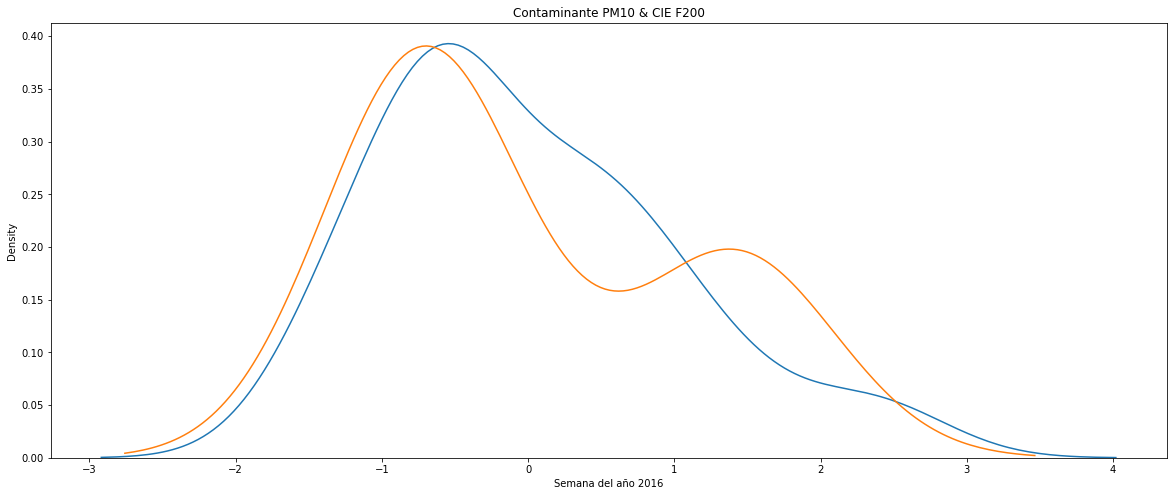


PM10 & O809


<ipython-input-18-1406bf182538>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


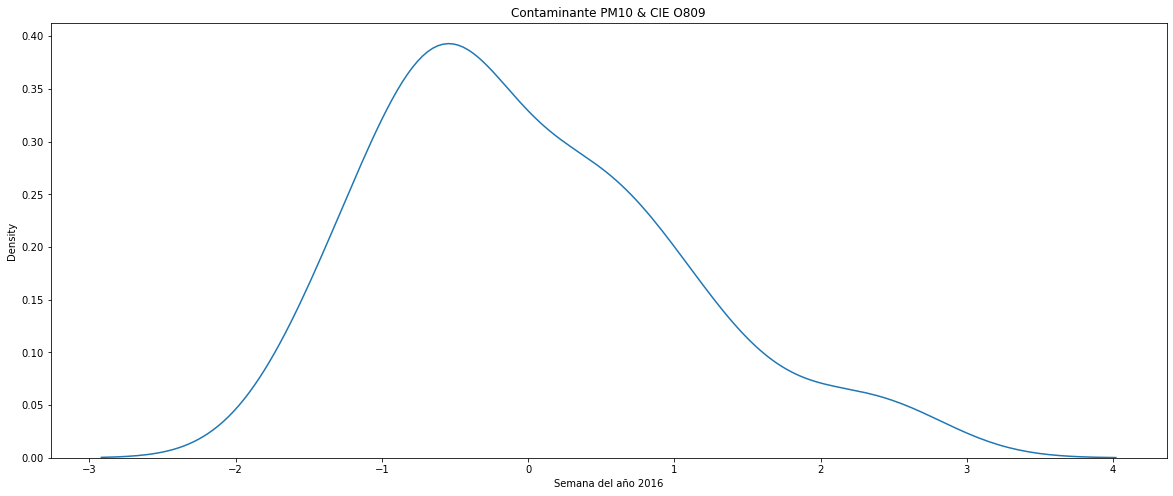

<ipython-input-18-1406bf182538>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



PM10 & F312


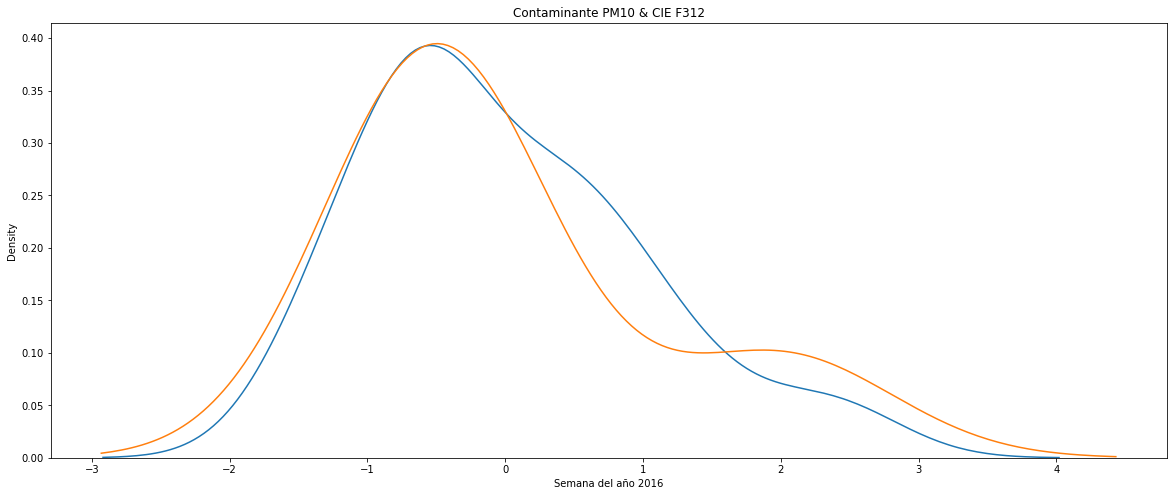

<ipython-input-18-1406bf182538>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



PM10 & F710


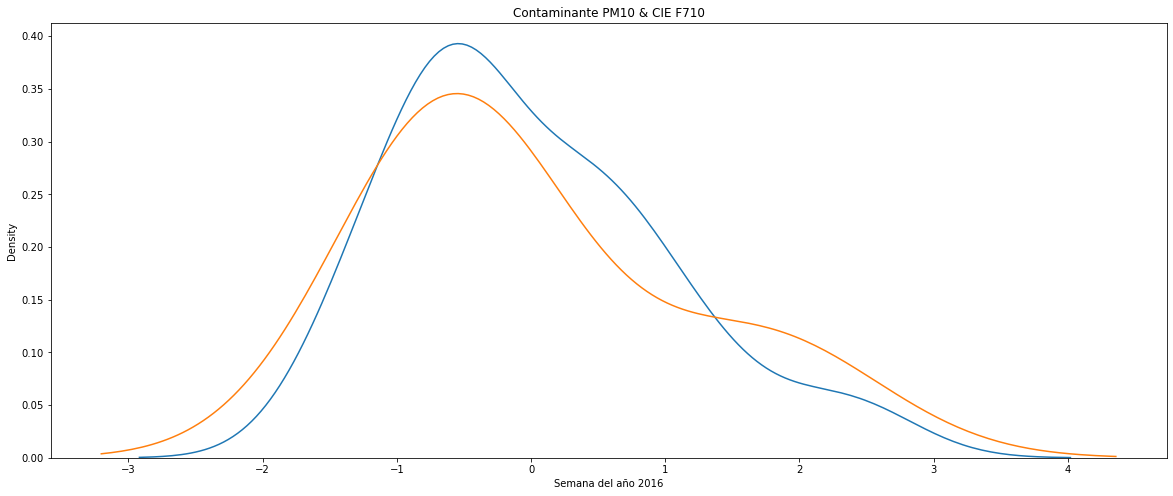

<ipython-input-18-1406bf182538>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



PM10 & C029


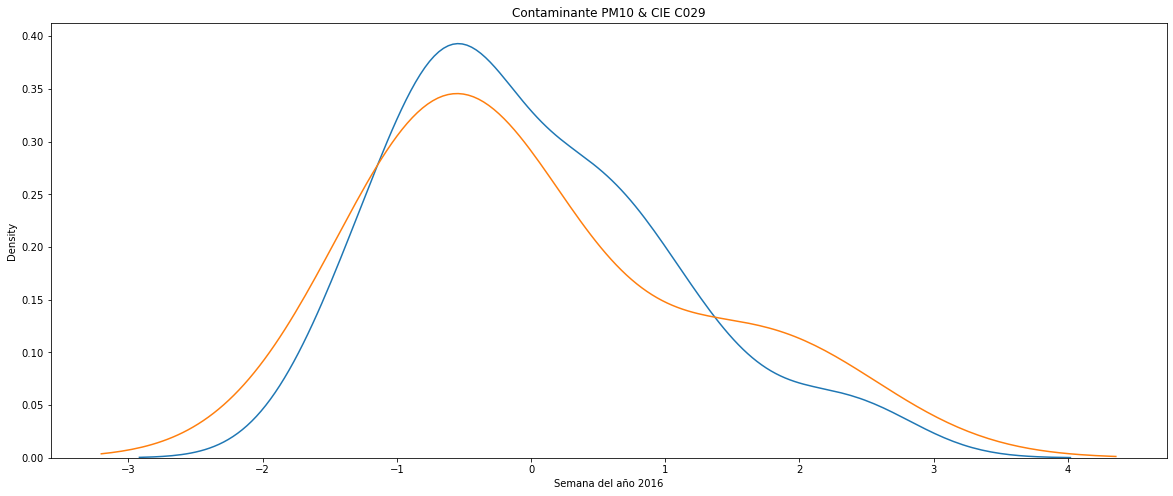

<ipython-input-18-1406bf182538>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



PM10 & T009


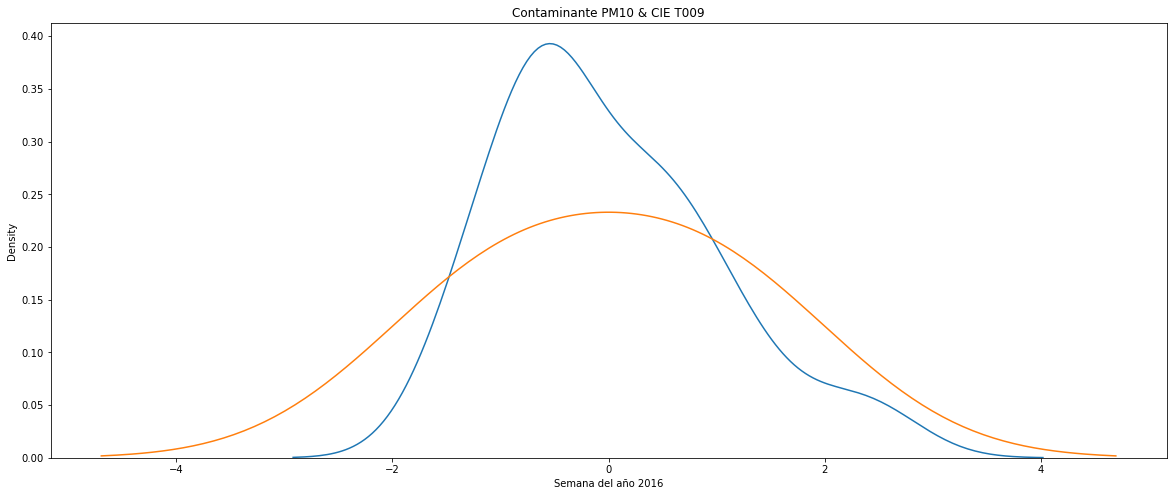

<ipython-input-18-1406bf182538>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)



PM10 & F322


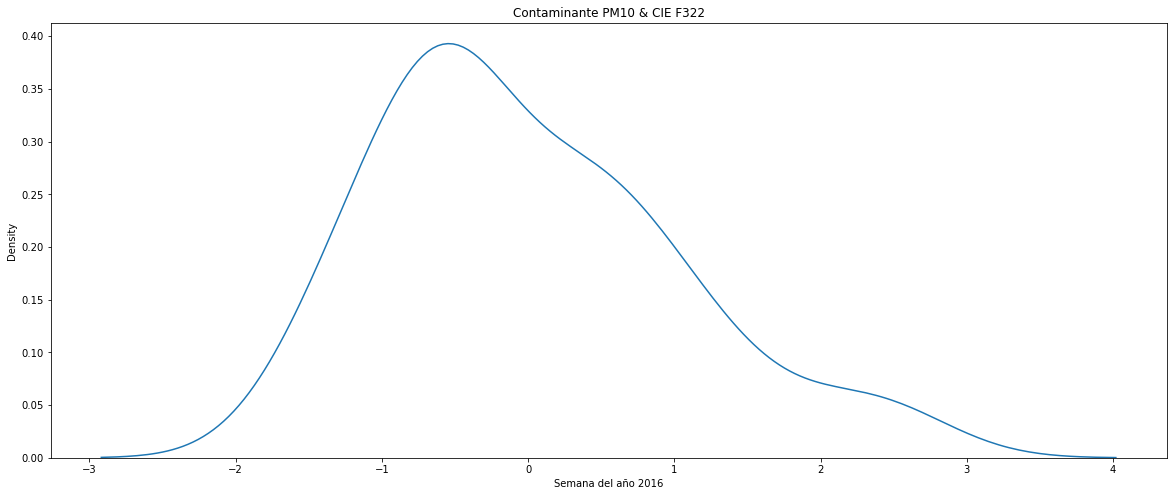

<ipython-input-18-1406bf182538>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)



PM10 & H


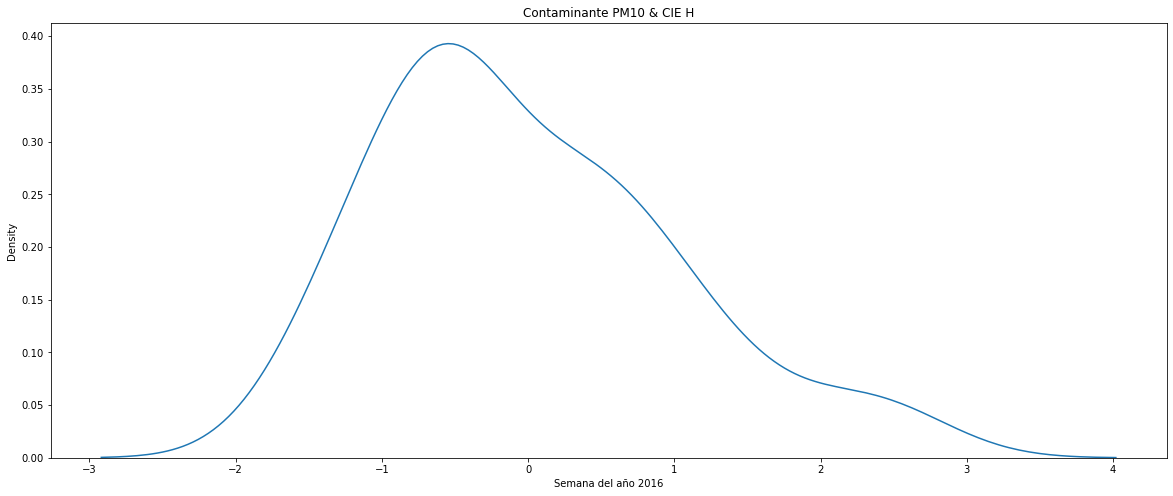

<ipython-input-18-1406bf182538>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]



PM10 & I


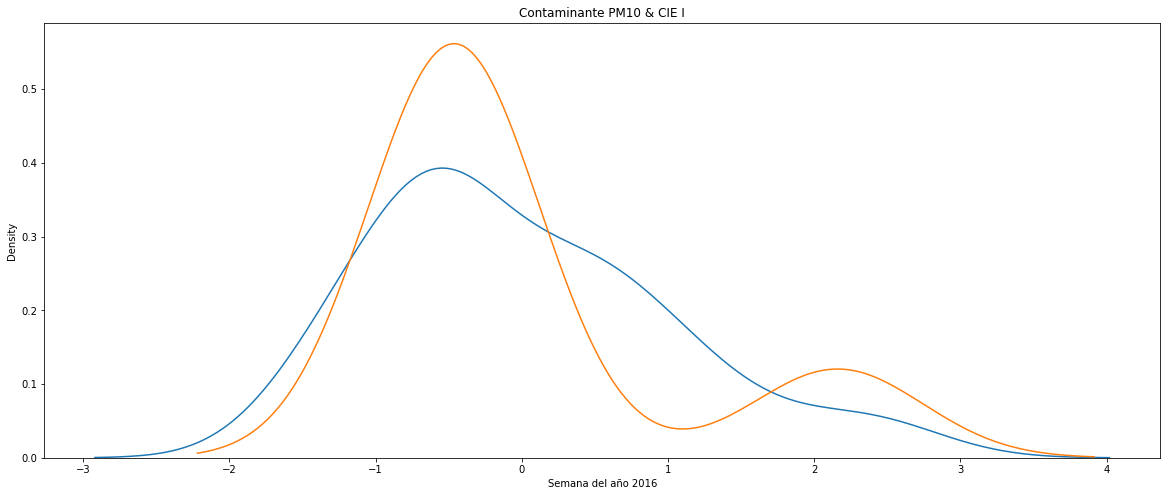

<ipython-input-18-1406bf182538>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)



PM10 & J


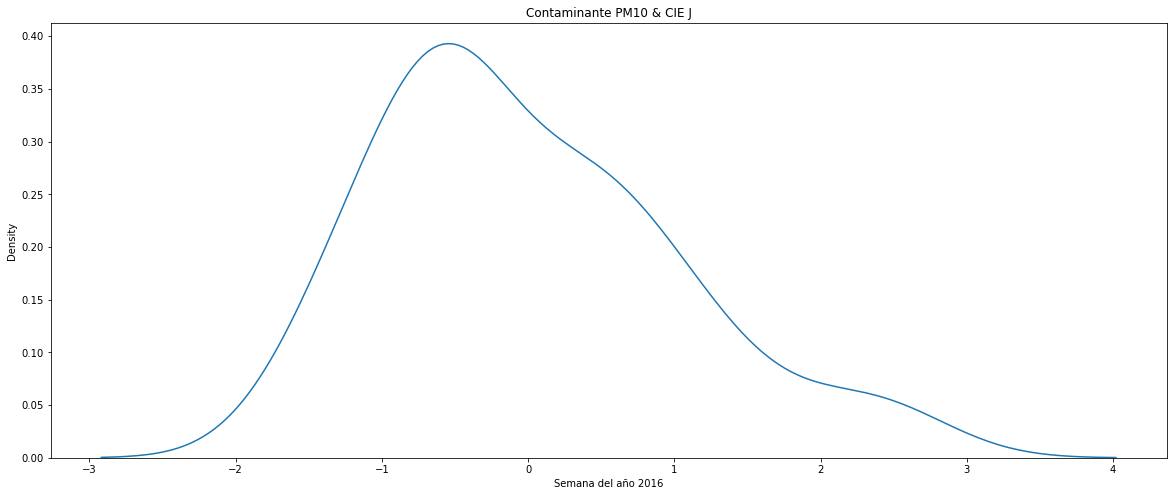

In [18]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1